In [1]:
import pandas as pd 
import seaborn as sns

import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("D7a_SME Growth Success Prediction.csv")

In [ ]:
Data Head

In [3]:
df.head(10)

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   
5         379         CA  37.406914 -122.090370    94043  c:22898   
6         195         CA  37.391559 -122.070264    94041  c:16191   
7         875         CA  38.057107 -122.513742    94901   c:5192   
8          16         MA  42.712207  -73.203599     1267   c:1043   
9         846         CA  37.427235 -122.145783    94306    c:498   

            city              Unnamed: 6                   name  labels  ...  \
0      San Diego                     NaN            Bandsintown       1  ...   
1      Los Gatos                     NaN              TriCipher       1  ...   
2      San Diego      San Diego CA 92121                  Plixi       1  ...   
3      Cupertino      Cupertino CA 95014      Solidcore Systems       1  ...   
4  San Francisco  San Francisco CA 94105         Inhale Digital       0  ...   
5  Mountain View  Mountain View CA 94043       Matisse Networks       0  ...   
6  Mountain View                     NaN  RingCube Technologies       1  ...   
7     San Rafael                     NaN              ClairMail       1  ...   
8   Williamstown    Williamstown MA 1267              VoodooVox       1  ...   
9      Palo Alto                     NaN               Doostang       1  ...   

  object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
0    c:6669      0         1          0           0           0           0   
1   c:16283      1         0          0           1           1           1   
2   c:65620      0         0          1           0           0           0   
3   c:42668      0         0          0           1           1           1   
4   c:65806      1         1          0           0           0           0   
5   c:22898      0         0          0           1           0           0   
6   c:16191      1         0          1           1           0           0   
7    c:5192      0         0          1           1           0           1   
8    c:1043      1         0          1           0           0           1   
9     c:498      1         1          1           0           0           0   

   avg_participants  is_top500    status  
0            1.0000          0  acquired  
1            4.7500          1  acquired  
2            4.0000          1  acquired  
3            3.3333          1  acquired  
4            1.0000          1    closed  
5            3.0000          1    closed  
6            1.6667          1  acquired  
7            3.5000          1  acquired  
8            4.0000          1  acquired  
9            1.0000          1  acquired  

[10 rows x 49 columns]

In [4]:
df.tail(10)

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
913         157         TX  29.739322  -95.444747    77027  c:15509   
914         879         NY  40.750519  -73.993494    10001  c:52378   
915         228         WI  43.090756  -89.522805    53562    c:167   
916         284         NY  40.742953  -73.984461    10018  c:17758   
917        1099         WA  47.802184 -122.196307    98021   c:8339   
918         352         CA  37.740594 -122.376471    94107  c:21343   
919         721         MA  42.504817  -71.195611     1803  c:41747   
920         557         CA  37.408261 -122.015920    94089  c:31549   
921         589         CA  37.556732 -122.288378    94404  c:33198   
922         462         CA  37.386778 -121.966277    95054  c:26702   

              city            Unnamed: 6                  name  labels  ...  \
913        Houston                   NaN                Rudder       0  ...   
914       New York     New York NY 10001              Panvidea       1  ...   
915      Middleton                   NaN                  Sway       0  ...   
916       New York                   NaN               TRAFFIQ       1  ...   
917        Bothell                   NaN              Dexterra       1  ...   
918  San Francisco                   NaN               CoTweet       1  ...   
919     Burlington    Burlington MA 1803    Reef Point Systems       0  ...   
920      Sunnyvale                   NaN       Paracor Medical       0  ...   
921  San Francisco                   NaN               Causata       1  ...   
922    Santa Clara  Santa Clara CA 95054  Asempra Technologies       1  ...   

    object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
913   c:15509      0         0          1           0           0           0   
914   c:52378      0         0          1           0           0           0   
915     c:167      0         0          1           0           0           0   
916   c:17758      1         0          1           1           0           0   
917    c:8339      1         0          0           0           1           1   
918   c:21343      0         0          1           0           0           0   
919   c:41747      1         0          0           1           0           0   
920   c:31549      0         0          0           0           0           1   
921   c:33198      0         0          1           1           0           0   
922   c:26702      0         0          0           1           0           0   

     avg_participants  is_top500    status  
913            1.0000          0    closed  
914            2.0000          1  acquired  
915            2.0000          0    closed  
916            2.3333          1  acquired  
917            5.6000          1  acquired  
918            6.0000          1  acquired  
919            2.6667          1    closed  
920            8.0000          1    closed  
921            1.0000          1  acquired  
922            3.0000          1  acquired  

[10 rows x 49 columns]

In [5]:
df.describe()

Unnamed: 0    latitude   longitude      labels  \
count   923.000000  923.000000  923.000000  923.000000   
mean    572.297941   38.517442 -103.539212    0.646804   
std     333.585431    3.741497   22.394167    0.478222   
min       1.000000   25.752358 -122.756956    0.000000   
25%     283.500000   37.388869 -122.198732    0.000000   
50%     577.000000   37.779281 -118.374037    1.000000   
75%     866.500000   40.730646  -77.214731    1.000000   
max    1153.000000   59.335232   18.057121    1.000000   

       age_first_funding_year  age_last_funding_year  \
count              923.000000             923.000000   
mean                 2.235630               3.931456   
std                  2.510449               2.967910   
min                 -9.046600              -9.046600   
25%                  0.576700               1.669850   
50%                  1.446600               3.528800   
75%                  3.575350               5.560250   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                771.000000               771.000000     923.000000   
mean                   3.055353                 4.754423       7.710726   
std                    2.977057                 3.212107       7.265776   
min                  -14.169900                -7.005500       0.000000   
25%                    1.000000                 2.411000       3.000000   
50%                    2.520500                 4.476700       5.000000   
75%                    4.686300                 6.753400      10.000000   
max                   24.684900                24.684900      63.000000   

       funding_rounds  ...  is_consulting  is_othercategory      has_VC  \
count      923.000000  ...     923.000000        923.000000  923.000000   
mean         2.310943  ...       0.003250          0.322860    0.326111   
std          1.390922  ...       0.056949          0.467823    0.469042   
min          1.000000  ...       0.000000          0.000000    0.000000   
25%          1.000000  ...       0.000000          0.000000    0.000000   
50%          2.000000  ...       0.000000          0.000000    0.000000   
75%          3.000000  ...       0.000000          1.000000    1.000000   
max         10.000000  ...       1.000000          1.000000    1.000000   

        has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
count  923.000000  923.000000  923.000000  923.000000  923.000000   
mean     0.254605    0.508126    0.392199    0.232936    0.099675   
std      0.435875    0.500205    0.488505    0.422931    0.299729   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       avg_participants   is_top500  
count        923.000000  923.000000  
mean           2.838586    0.809317  
std            1.874601    0.393052  
min            1.000000    0.000000  
25%            1.500000    1.000000  
50%            2.500000    1.000000  
75%            3.800000    1.000000  
max           16.000000    1.000000  

[8 rows x 35 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Determine unique if needed!!

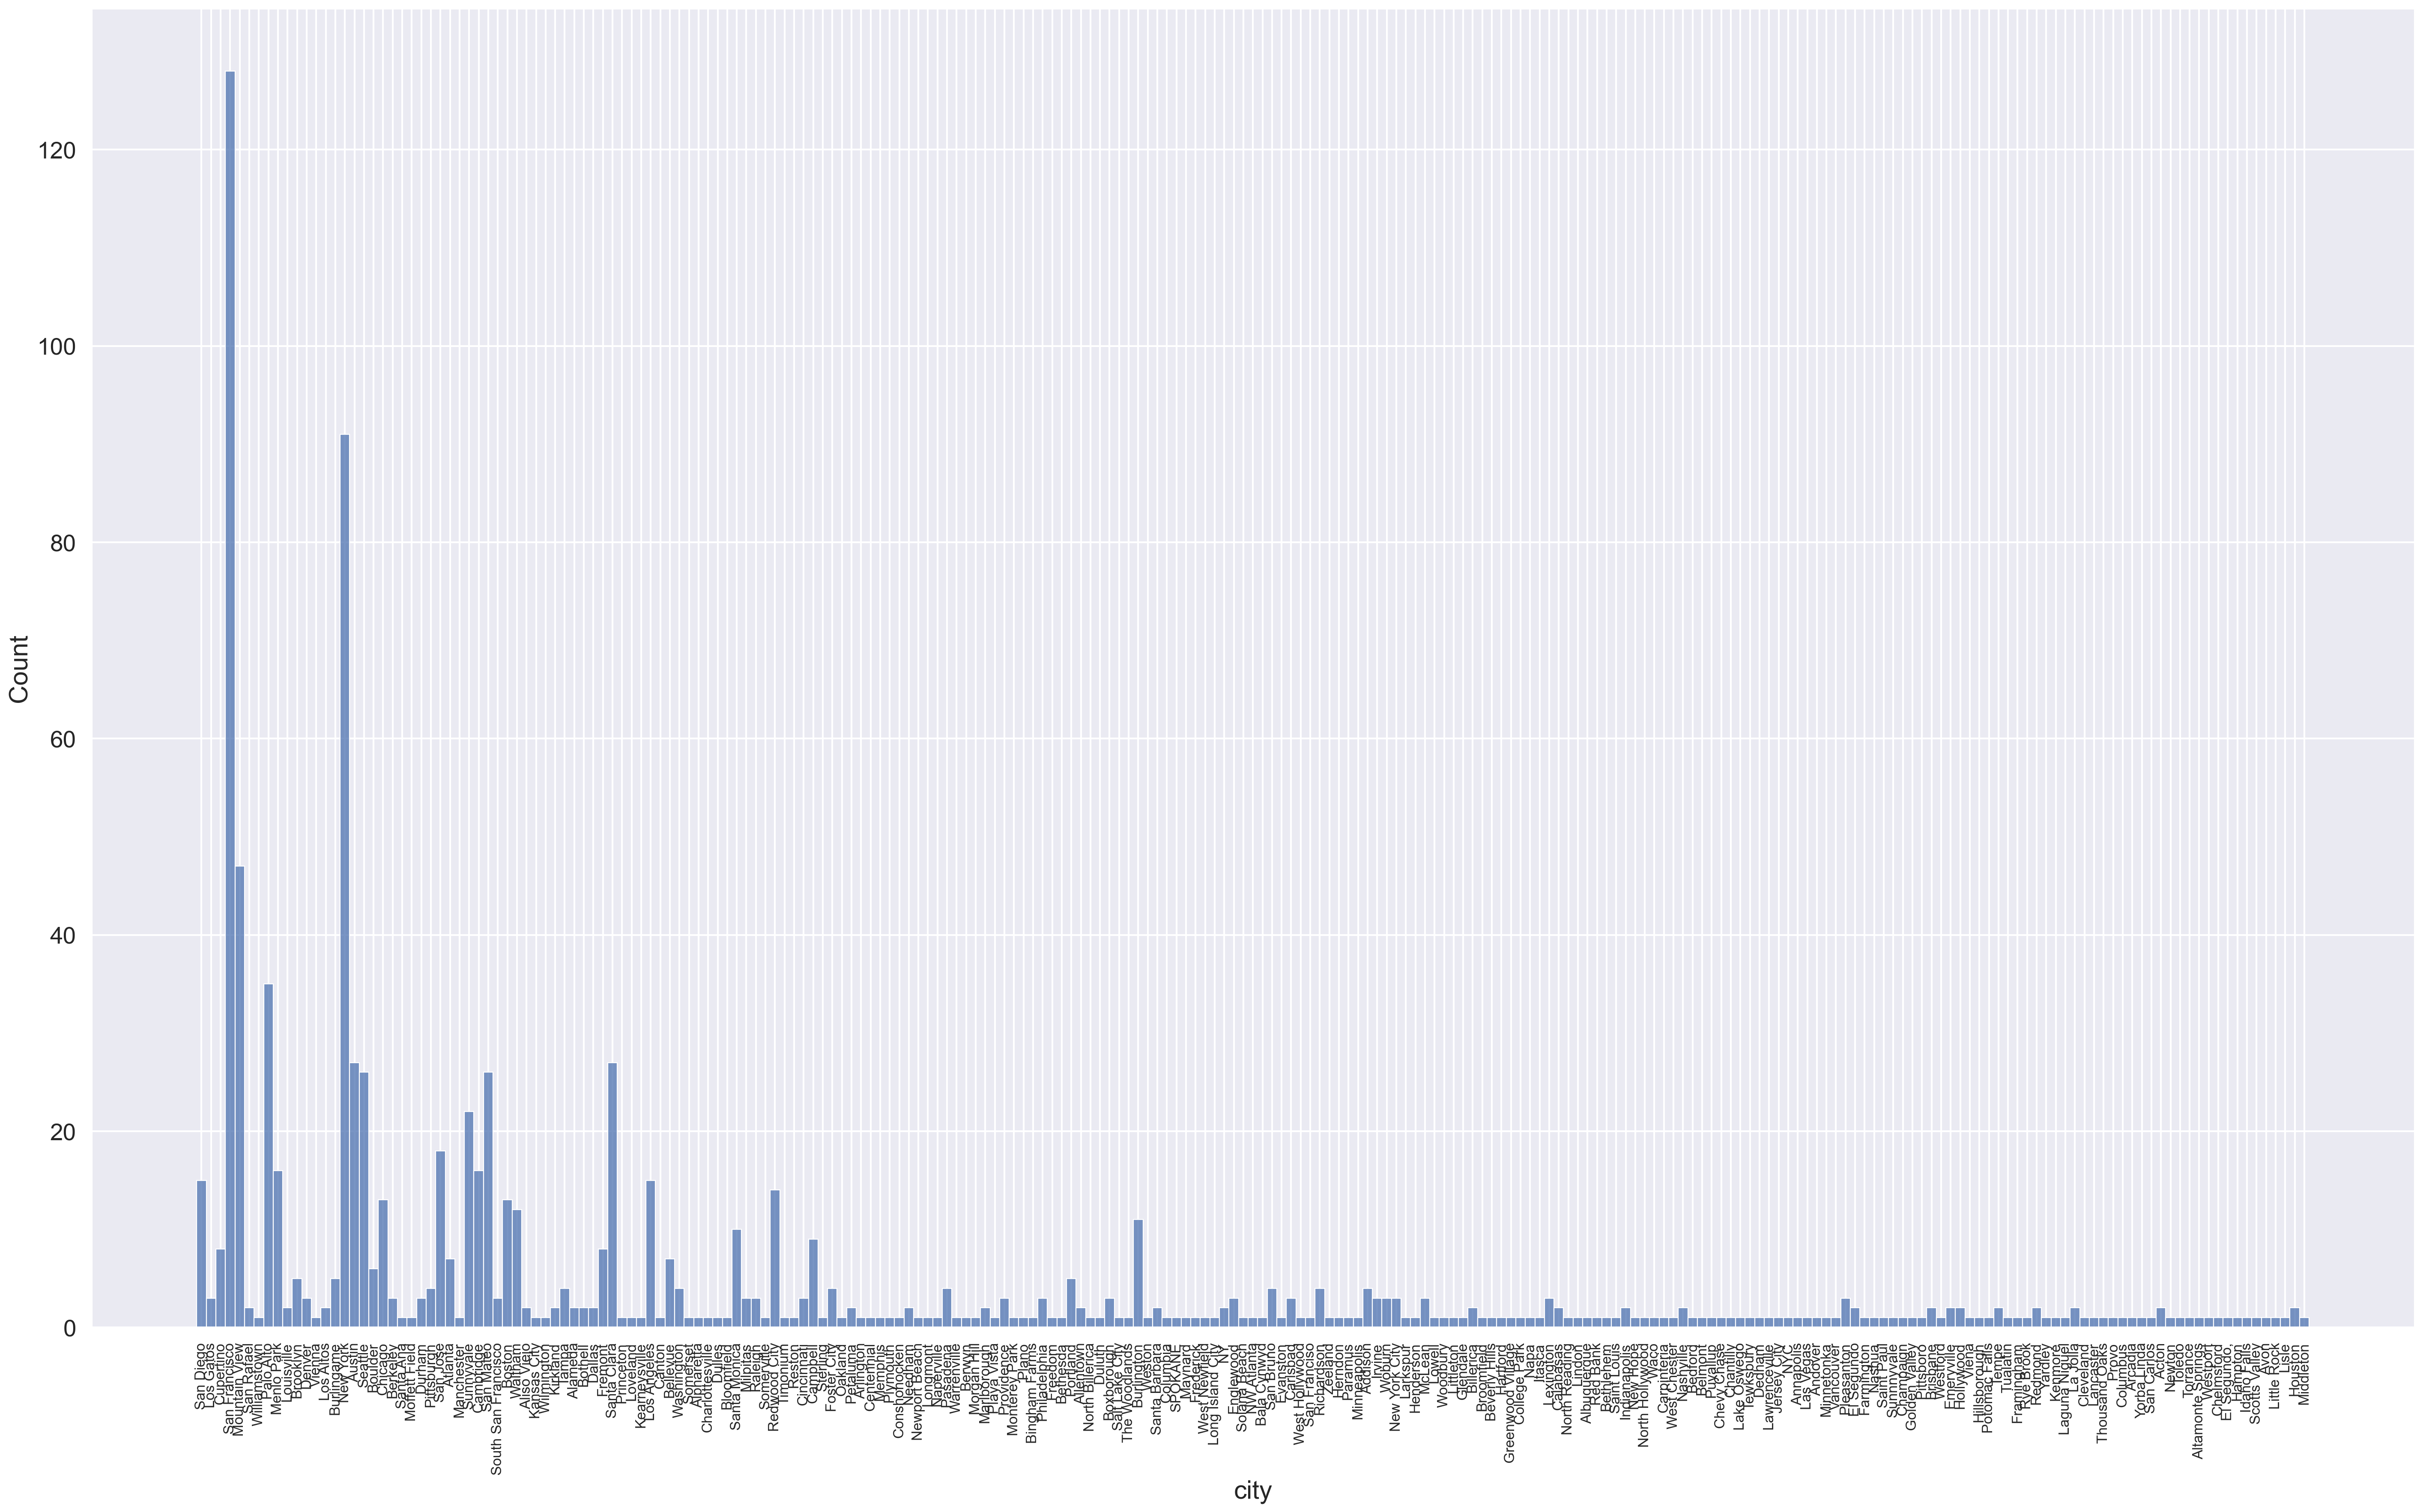

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Setting seaborn defaults
sns.set()
sns.set(rc={'figure.figsize':(35, 20)})
sns.set_context("talk", font_scale=1.2)

# Plot a histogram to see the age distribution
sns.histplot(df['city'], kde=False)

# Rotate X-axis labels vertically and reduce font size
plt.xticks(rotation=90, fontsize=12)

plt.show()

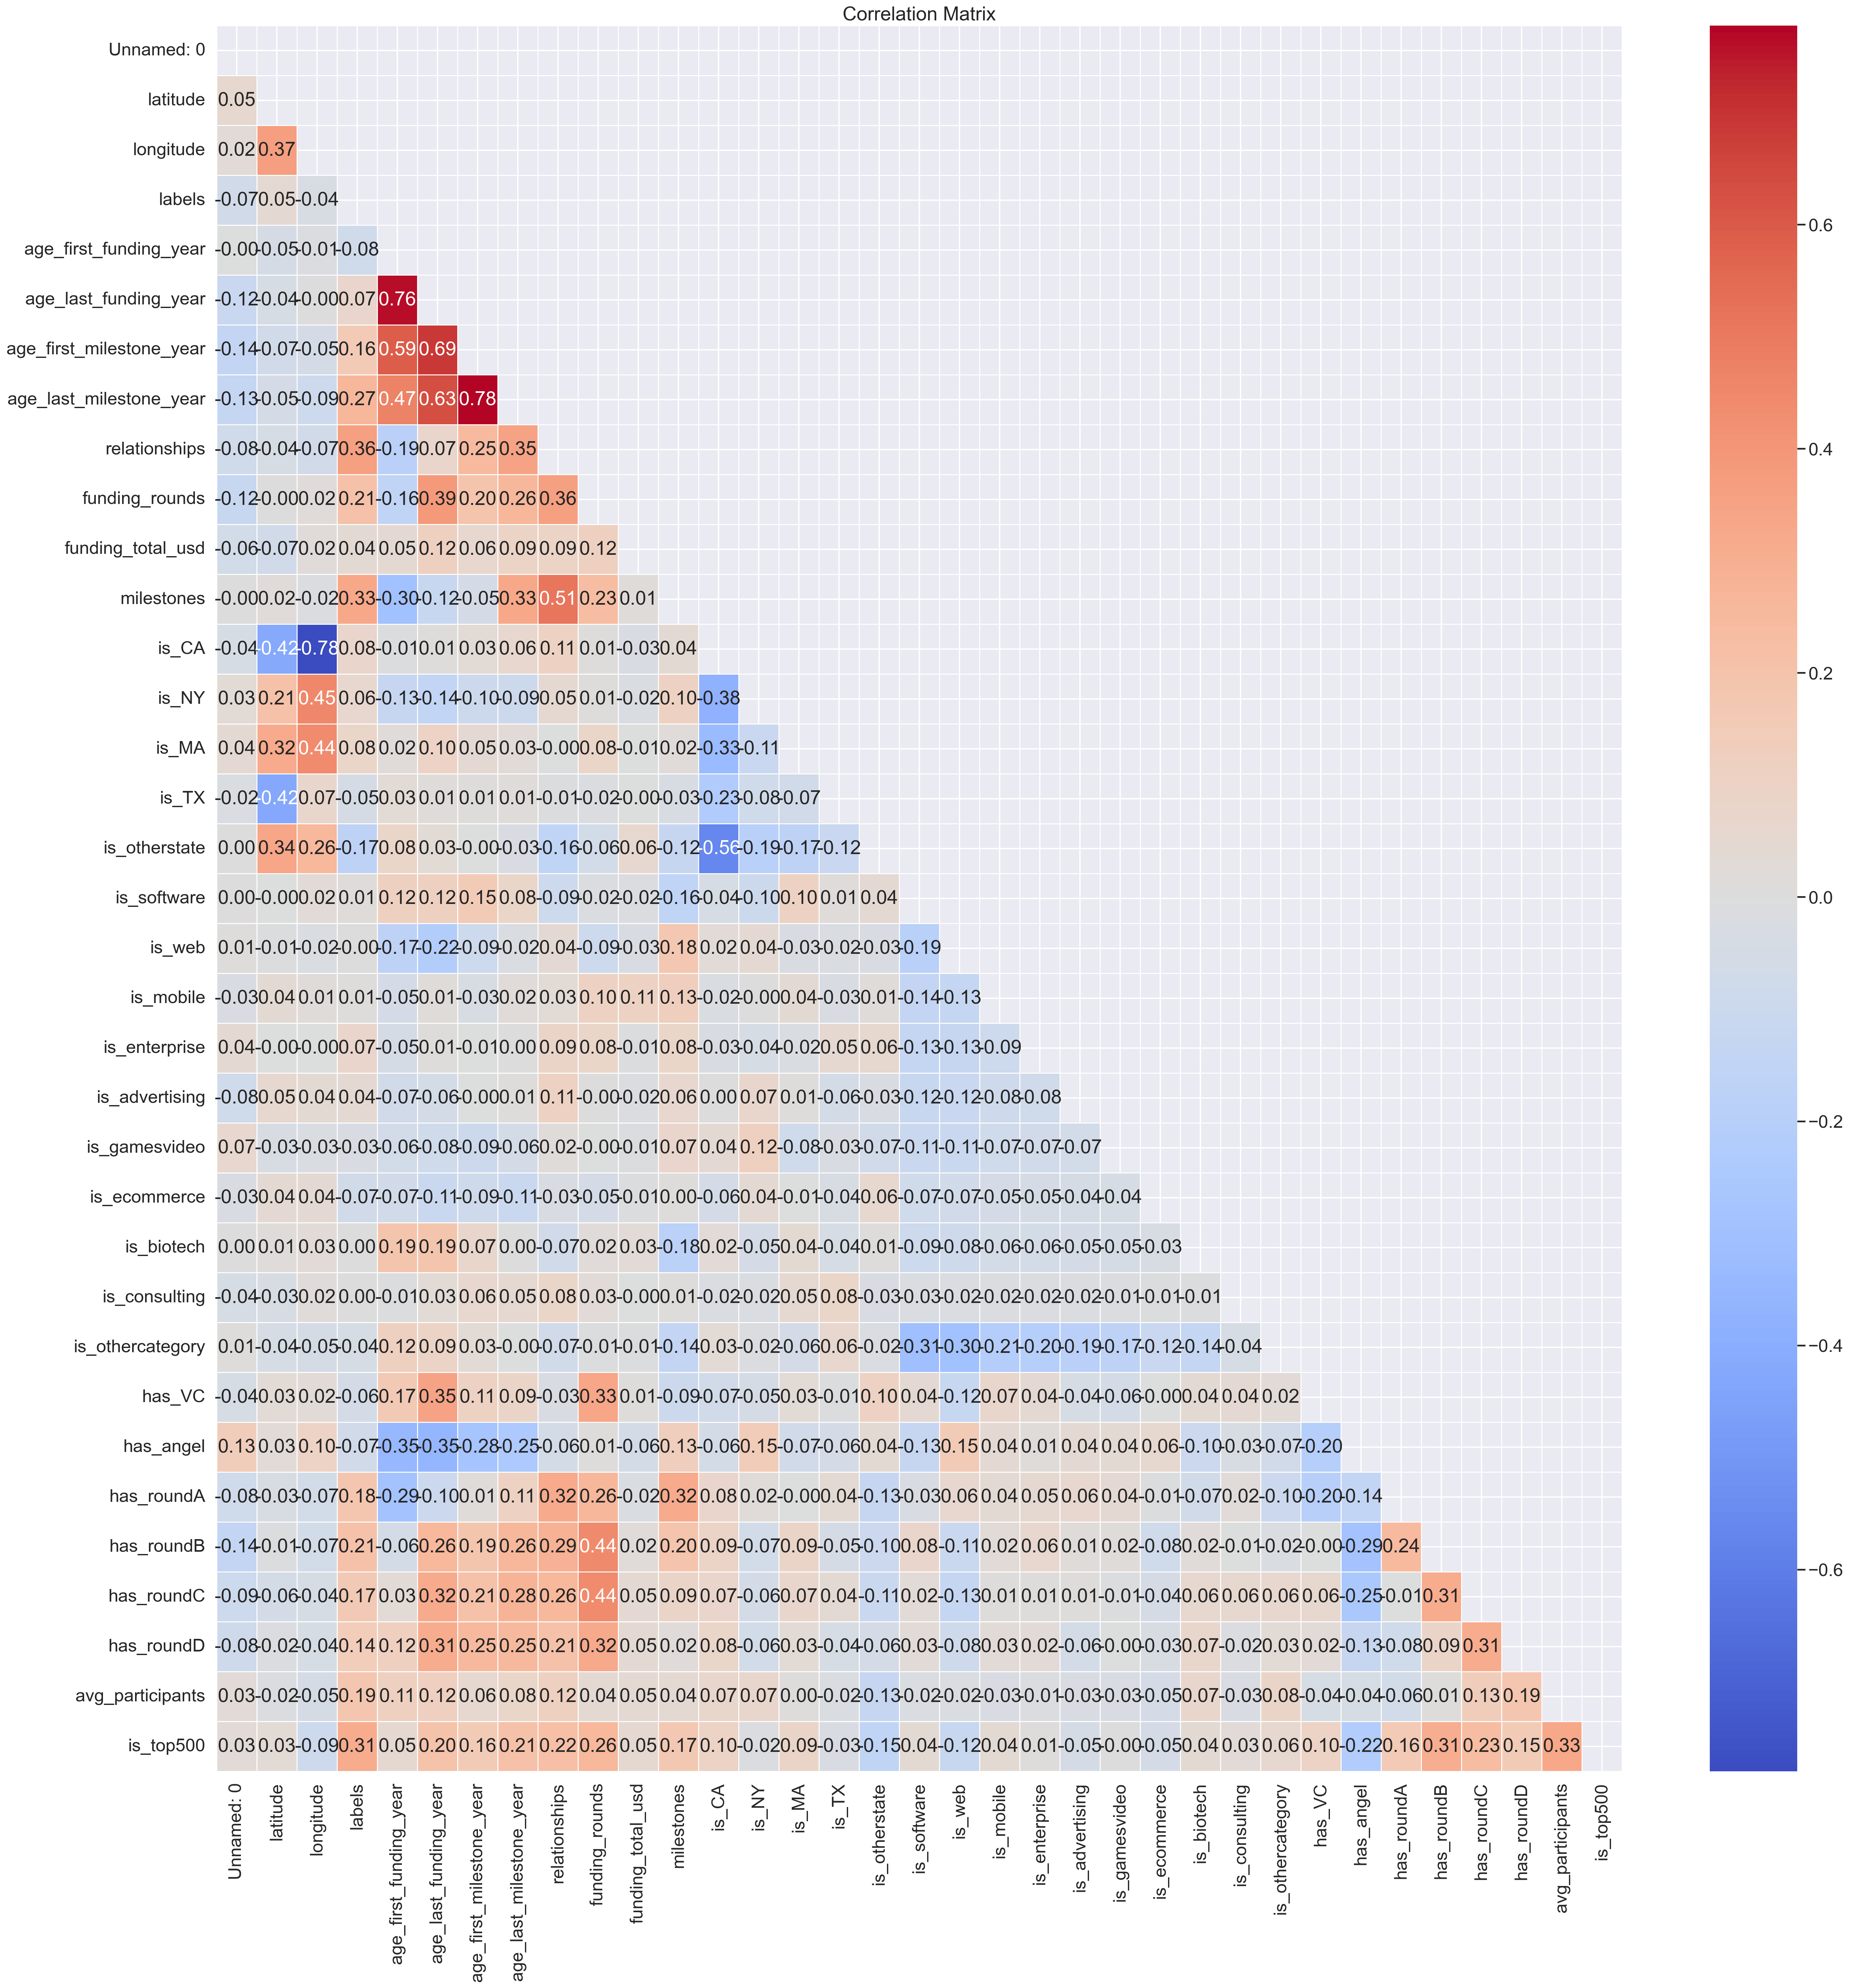

In [5]:

# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(35, 35))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

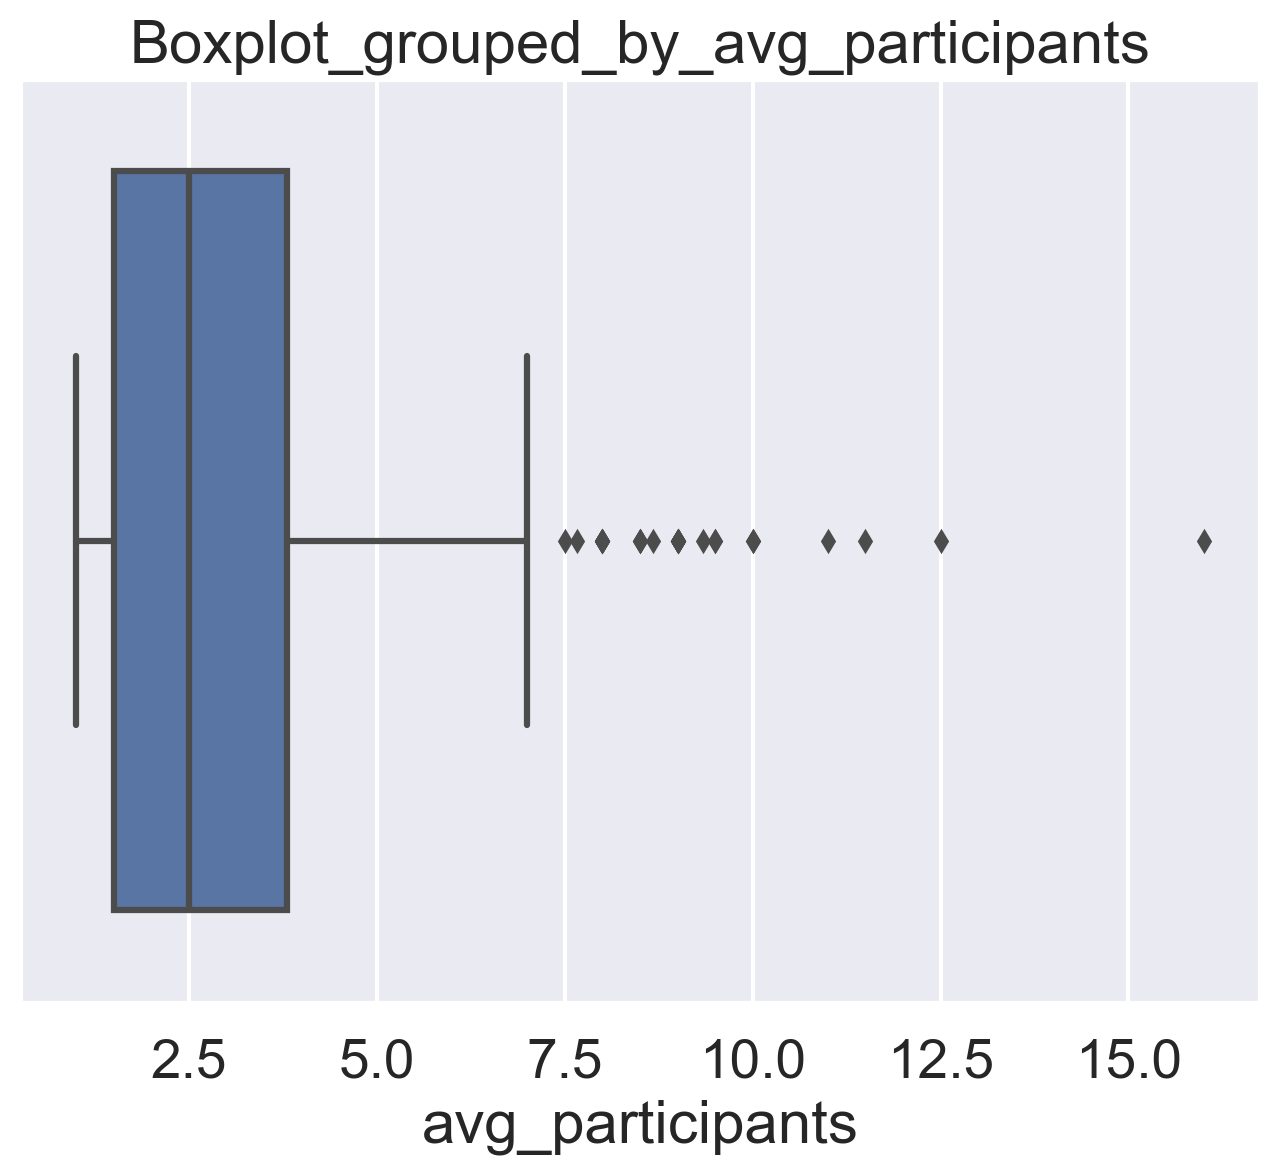

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

####Boxplot#####
plt.figure(figsize=(8, 6))
sns.boxplot(x='avg_participants', data=df)  # Replace 'actual_column_name' with the name of the column you want to plot
plt.xlabel('avg_participants')
plt.title('Boxplot_grouped_by_avg_participants')
plt.show()


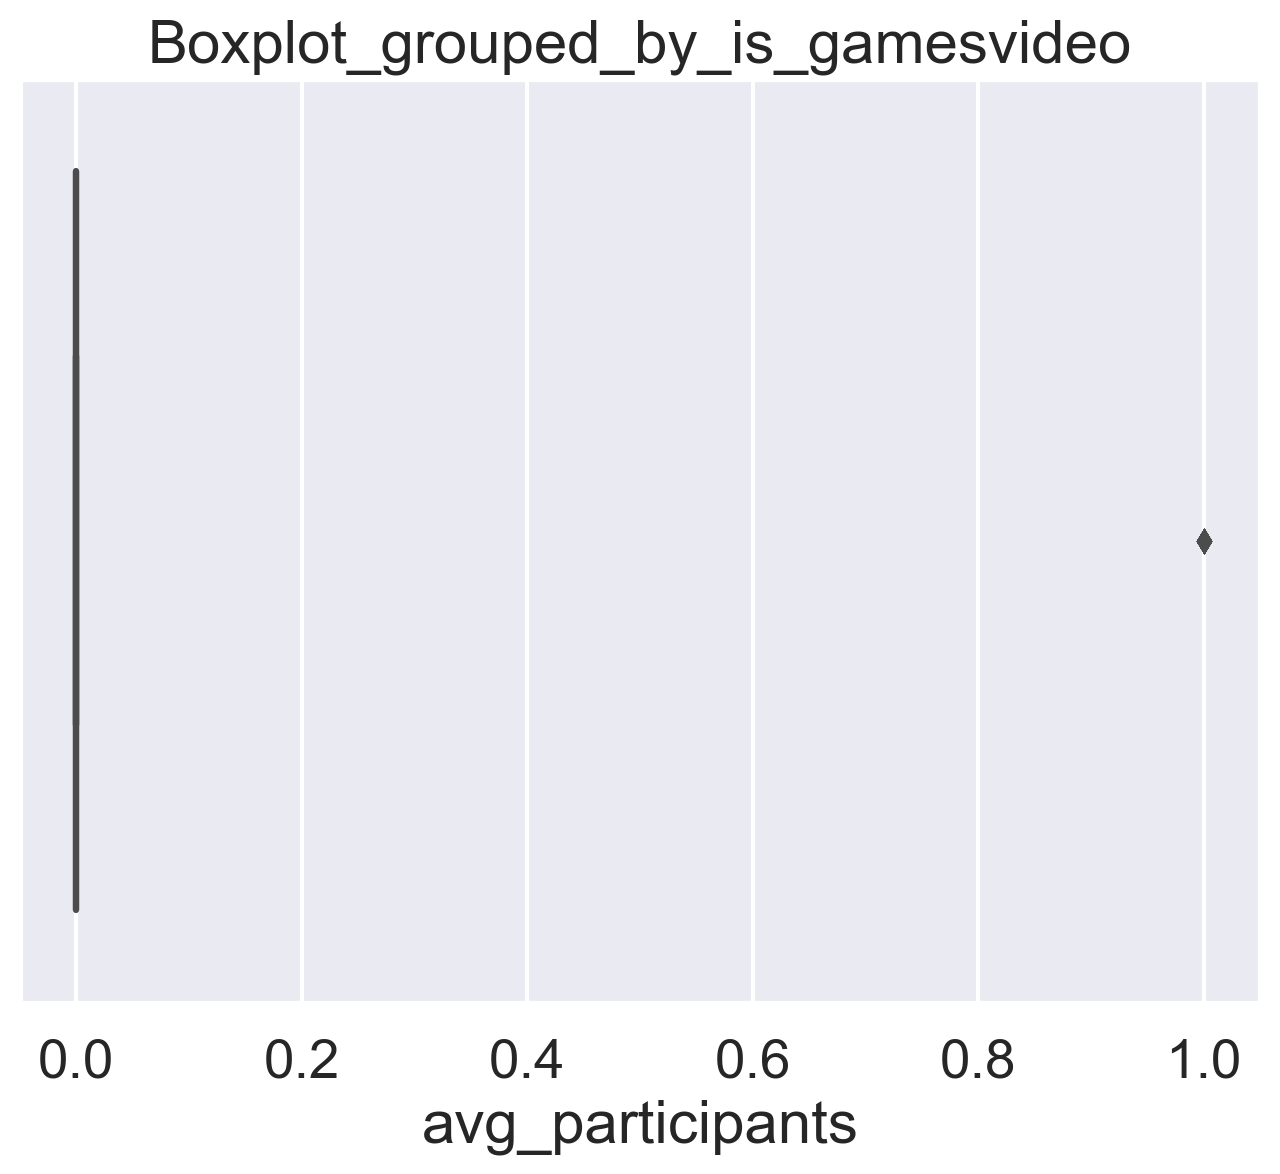

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

####Boxplot#####
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_gamesvideo', data=df)  # Replace 'actual_column_name' with the name of the column you want to plot
plt.xlabel('avg_participants')
plt.title('Boxplot_grouped_by_is_gamesvideo')
plt.show()

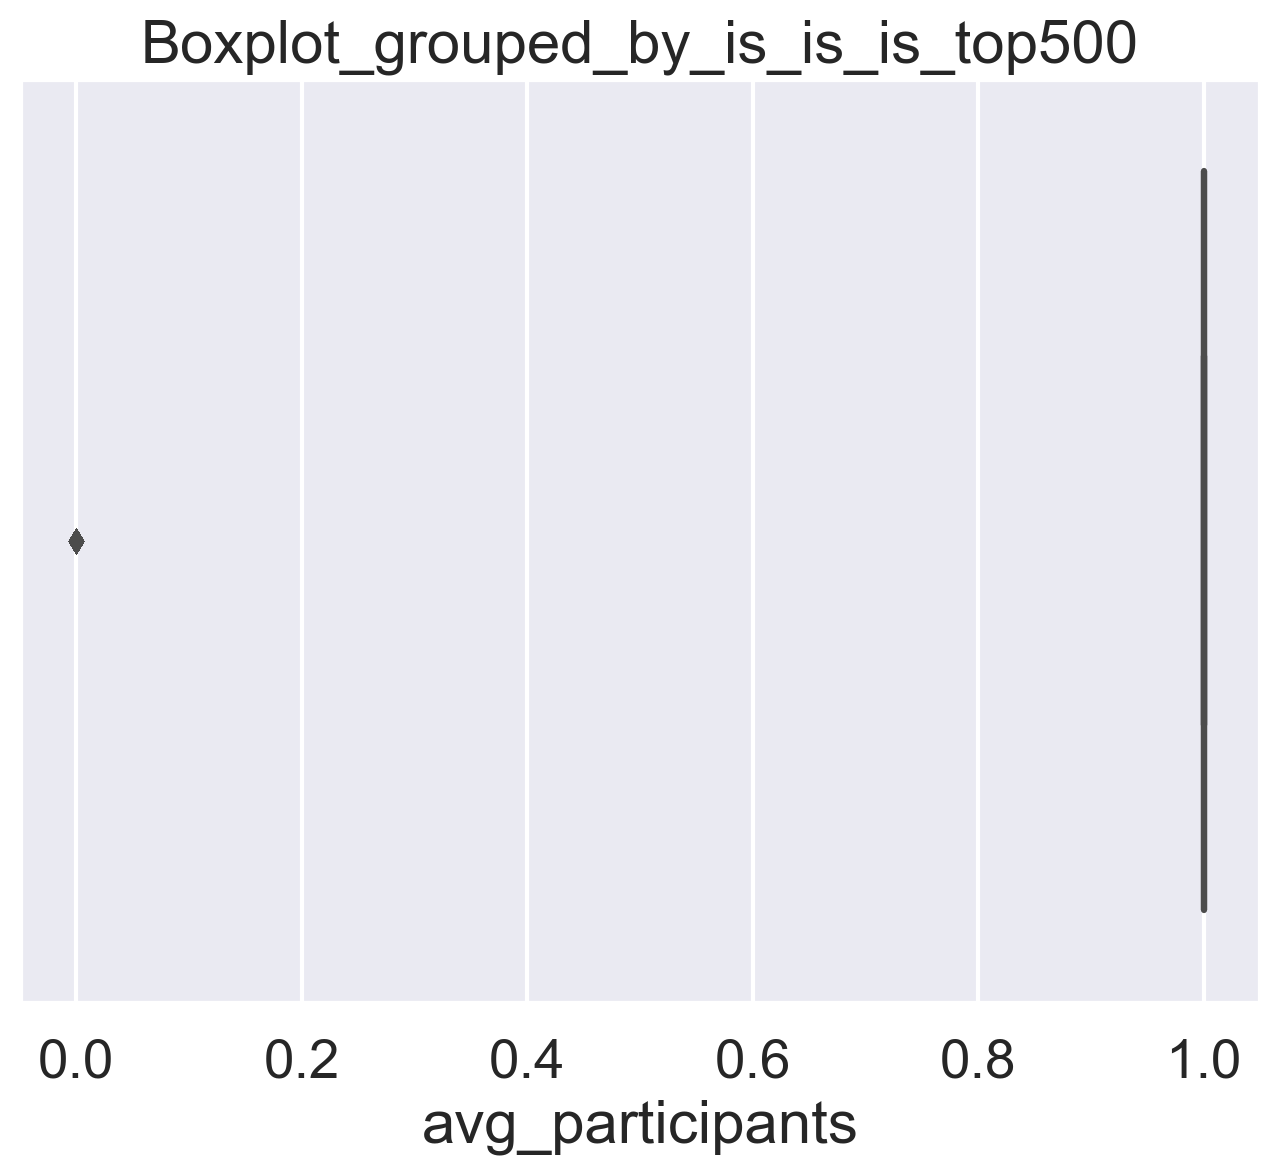

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

####Boxplot#####
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_top500', data=df)  # Replace 'actual_column_name' with the name of the column you want to plot
plt.xlabel('avg_participants')
plt.title('Boxplot_grouped_by_is_is_is_top500')
plt.show()

Size and Dimension:
(923, 49)

Data Types:
Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                

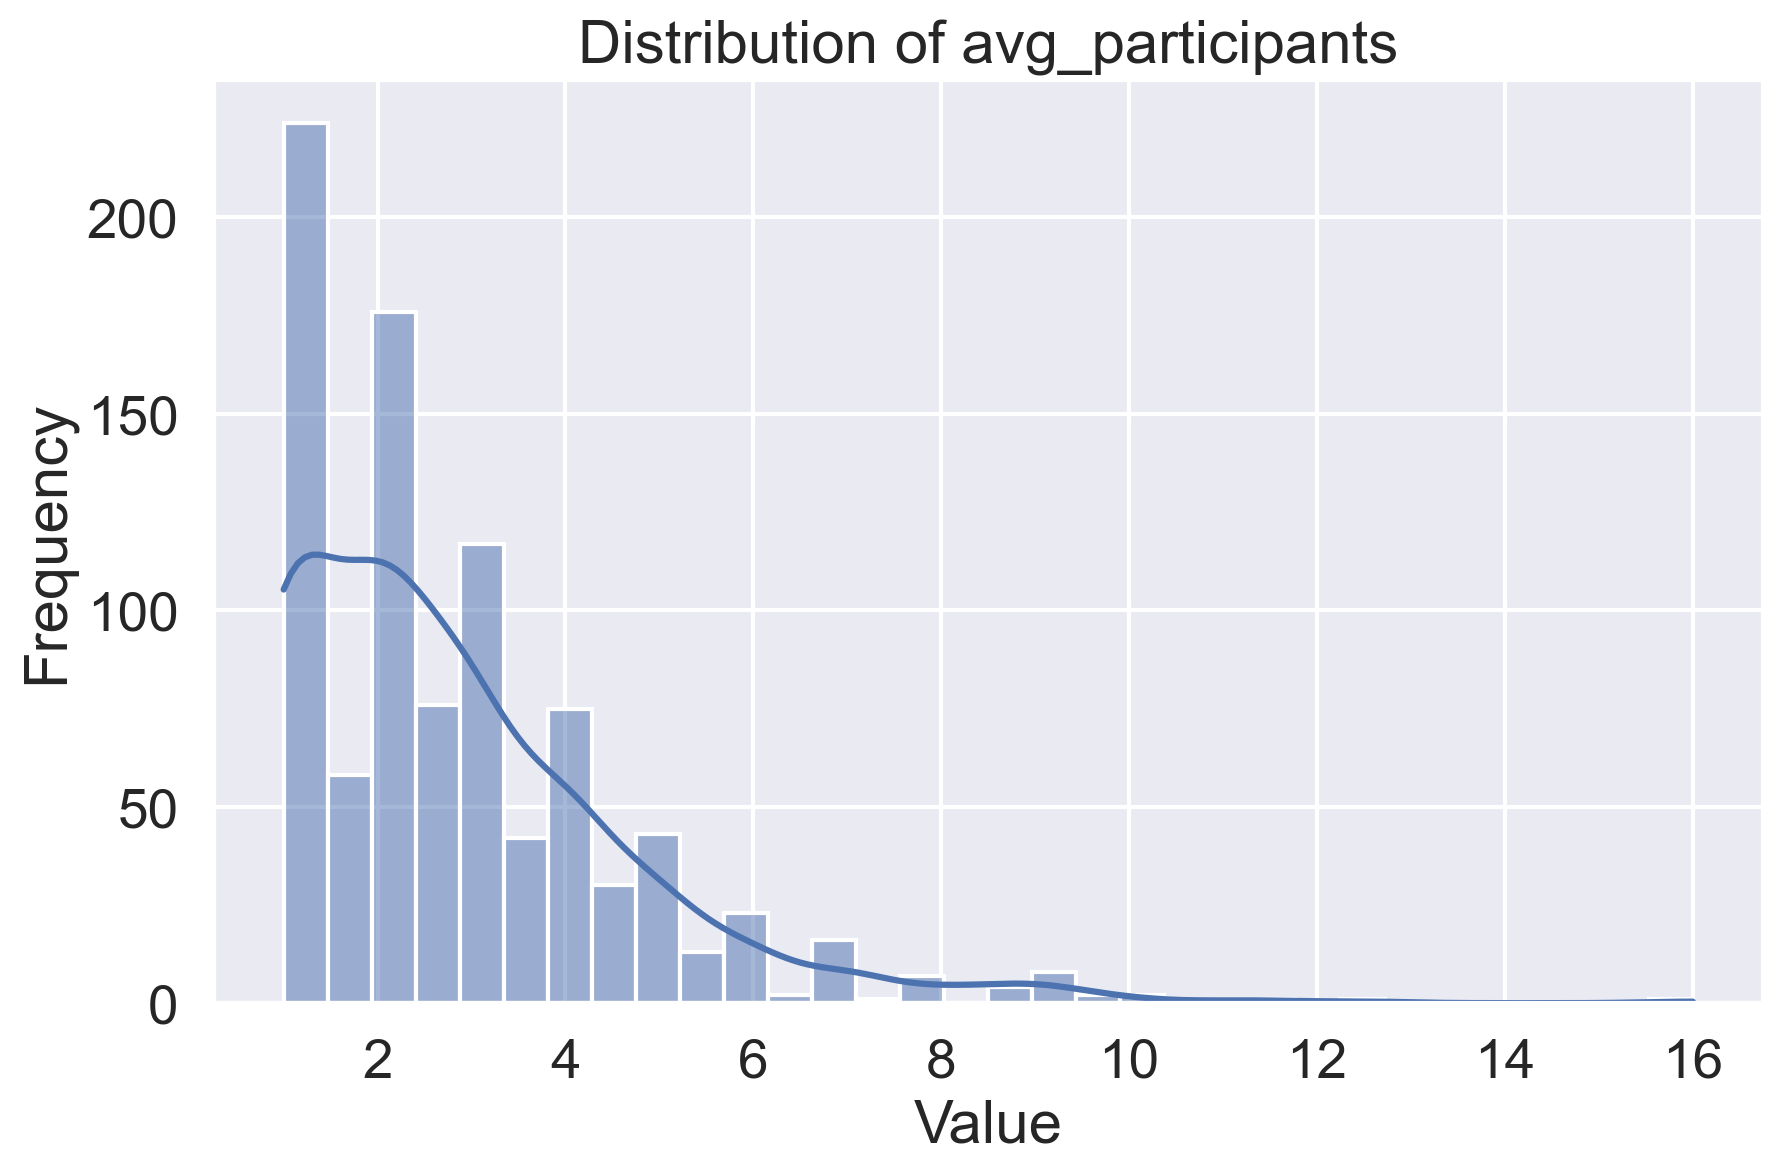


Missing Values:
Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                 

In [8]:
# Describe Properties
print("Size and Dimension:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

# Distribution of Numerical Variables
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_participants'], kde=True)
plt.title('Distribution of avg_participants')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Explore Issues
print("\nMissing Values:")
print(df.isnull().sum())

# Check for Outliers
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='categorical_column', y='numerical_column', data=df)
# plt.title('Box Plot of Numerical Column by Categorical Column')
# plt.xlabel('Categorical Column')
# plt.ylabel('Numerical Column')
# plt.show()

# Check for Duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# # Correlation Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# data cleaning and solving issues:

In [9]:
import pandas as pd


# Convert 'status' column to binary values
df['status'] = df['status'].map({'acquired': 1, 'closed': 0})

# Dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 6', 'name', 'labels', 'object_id']
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [11]:
original_df=pd.read_csv("D7a_SME Growth Success Prediction.csv")
df['status'] = original_df['status']
# Convert 'status' column to binary values
df['status'] = df['status'].map({'acquired': 1, 'closed': 0})
df.head(20)

state_code   latitude   longitude zip_code       id           city  \
4          CA  37.779281 -122.419236    94105  c:65806  San Francisco   
5          CA  37.406914 -122.090370    94043  c:22898  Mountain View   
11         CA  37.452992 -122.185098    94025   c:4829     Menlo Park   
16         CA  37.396283 -122.105531    94022  c:16770      Los Altos   
19         CA  37.446411 -122.160540    94301  c:26368      Palo Alto   
21         WA  47.602605 -122.284865    98122  c:17857        Seattle   
22         CA  37.426316 -122.141082    94306  c:15888      Palo Alto   
23         CA  37.764395 -122.401024    94103  c:10751  San Francisco   
30         CA  37.422859 -122.045217    94035  c:21492  Moffett Field   
35         NY  40.739010  -73.997259    10011  c:45111       New York   
36         CA  37.791137 -122.391843    94111   c:3178  San Francisco   
42         CA  40.015733 -105.275027    94025  c:13733     Menlo Park   
60         MA  42.546483  -71.173667     1887  c:35157     Wilmington   
61         CA  37.805289 -122.404448    94111   c:8596  San Francisco   
73         CA  37.779026 -122.401840    94103    c:170  San Francisco   
75         CA  37.548270 -121.988572    94538  c:46186        Fremont   
79         MA  42.375100  -71.105616     2138  c:31514      Cambridge   
82         CO  40.397761 -105.074980    80538  c:51023       Loveland   
87         MI  42.350749  -83.444589    48187  c:28424         Canton   
97         NJ  40.535316  -74.521435     8873  c:23234       Somerset   

   founded_at   closed_at first_funding_at last_funding_at  ...  \
4    8/1/2010   10/1/2012         8/1/2010        4/1/2012  ...   
5    1/1/2002   2/15/2009        7/18/2006       7/18/2006  ...   
11   1/1/2006   12/2/2011         2/1/2007        5/3/2011  ...   
16   1/1/2003   9/22/2012         8/2/2005       10/5/2009  ...   
19   1/1/2007   9/10/2011         7/2/2009      10/30/2009  ...   
21   1/1/2004   9/28/2011       10/31/2007      10/31/2007  ...   
22   1/1/2002   7/25/2008        6/28/2007       6/28/2007  ...   
23   1/1/2008    8/2/2013         1/1/2007       4/25/2011  ...   
30   1/1/2007  11/14/2012         5/9/2008        3/1/2009  ...   
35   7/1/2004   10/1/2008        2/26/2007       2/26/2007  ...   
36   1/1/2007   1/28/2011        8/15/2007        8/5/2008  ...   
42   1/1/2008   2/15/2011         2/8/2008       5/21/2010  ...   
60  12/1/1999  11/11/2011        9/12/2002      11/10/2010  ...   
61   1/1/2005   7/28/2011         7/1/2008        7/1/2008  ...   
73   1/1/2003    2/1/2001         9/1/2004        5/1/2012  ...   
75   1/1/2003    2/7/2008        9/12/2005        1/1/2007  ...   
79   8/1/2008    5/1/2013         1/1/2008       12/4/2009  ...   
82   1/1/2007   11/1/2012         7/6/2010      12/15/2010  ...   
87   1/1/2001    5/1/2013       11/19/2008       8/30/2011  ...   
97   1/1/2007   2/11/2012        5/29/2008       5/29/2008  ...   

    is_othercategory  has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
4                  0       1          1           0           0           0   
5                  1       0          0           0           1           0   
11                 0       1          1           1           0           0   
16                 1       1          0           1           1           1   
19                 0       0          0           1           1           0   
21                 1       0          0           0           1           0   
22                 0       0          0           1           0           0   
23                 0       0          1           1           0           0   
30                 1       0          0           1           1           0   
35                 0       0          0           0           1           0   
36                 0       0          0           1           1           0   
42                 1       1          0           1           0           0   
60                 0       0      

In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data
# Replace 'df' with the name of your DataFrame if it's different

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'city' and 'state_code' columns
df['city'] = label_encoder.fit_transform(df['city'])
df['state_code'] = label_encoder.fit_transform(df['state_code'])

In [13]:
# Replace 'df' with the name of your DataFrame if it's different

# Convert date columns to datetime objects
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

# Extract useful features from date columns
df['lifespan_days'] = (df['closed_at'] - df['founded_at']).dt.days
df['time_to_first_funding_days'] = (df['first_funding_at'] - df['founded_at']).dt.days

# Drop the original date columns
df.drop(['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'], axis=1, inplace=True)

In [14]:
# Assuming df is your DataFrame containing the data
# Replace 'df' with the name of your DataFrame if it's different

# Remove the "c:" prefix from the id column
df['id'] = df['id'].str.replace('c:', '')

# Convert the id column to numeric type
df['id'] = pd.to_numeric(df['id'], errors='coerce')


In [42]:
df.head(20)

state_code   latitude   longitude  zip_code     id  city  \
4            1  37.779281 -122.419236     94105  65806    77   
5            1  37.406914 -122.090370     94043  22898    50   
11           1  37.452992 -122.185098     94025   4829    46   
16           1  37.396283 -122.105531     94022  16770    41   
19           1  37.446411 -122.160540     94301  26368    59   
21          25  47.602605 -122.284865     98122  17857    84   
22           1  37.426316 -122.141082     94306  15888    59   
23           1  37.764395 -122.401024     94103  10751    77   
30           1  37.422859 -122.045217     94035  21492    49   
35          17  40.739010  -73.997259     10011  45111    55   
36           1  37.791137 -122.391843     94111   3178    77   
42           1  40.015733 -105.275027     94025  13733    46   
60           9  42.546483  -71.173667      1887  35157    96   
61           1  37.805289 -122.404448     94111   8596    77   
73           1  37.779026 -122.401840     94103    170    77   
75           1  37.548270 -121.988572     94538  46186    26   
79           9  42.375100  -71.105616      2138  31514    12   
82           2  40.397761 -105.074980     80538  51023    44   
87          11  42.350749  -83.444589     48187  28424    13   
97          15  40.535316  -74.521435      8873  23234    85   

    age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
4                   0.0000                 1.6685                    0.0384   
5                   4.5452                 4.5452                    5.0027   
11                  1.0849                 5.3370                   -0.6164   
16                  2.5863                 6.7644                    5.5014   
19                  2.5014                 2.8301                    3.0877   
21                  3.8329                 3.8329                    3.7507   
22                  5.4904                 5.4904                    0.0000   
23                 -1.0000                 3.3151                    3.6959   
30                  1.3534                 2.1644                    4.5178   
35                  2.6575                 2.6575                    0.0000   
36                  0.6192                 1.5945                    1.0000   
42                  0.1041                 2.3863                    2.3315   
60                  2.7836                10.9507                   -1.9151   
61                  3.4986                 3.4986                    3.0000   
73                  1.6685                 9.3370                    7.3808   
75                  2.6986                 4.0027                    1.0000   
79                 -0.5836                 1.3425                    0.0000   
82                  3.5123                 3.9562                    3.9534   
87                  7.8877                10.6658                    0.4137   
97                  1.4082                 1.4082                    0.0000   

    age_last_milestone_year  ...  has_angel  has_roundA  has_roundB  \
4                    0.0384  ...          1           0           0   
5                    5.0027  ...          0           0           1   
11                   4.6082  ...          1           1           0   
16                   5.5014  ...          0           1           1   
19                   3.4932  ...          0           1           1   
21                   3.7507  ...          0           0           1   
22                   0.0000  ...          0           1           0   
23                   5.6630  ...          1           1           0   
30                   4.5178  ...          0           1           1   
35                   0.0000  ...          0           0           1   
36                   4.3315  ...          0           1           1   
42                   2.7918  ...          0           1           0   
60                  -1.9151  ...          0           0           1   
61   

# Eksathe Shob

In [15]:
df.to_csv('cleaned_dataset.csv', index=False)

In [16]:
df=pd.read_csv("cleaned_dataset.csv")
df.drop(['state_code'], axis=1, inplace=True)
df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


# Assuming your dataset is named df
# Extract features (X) and target variable (y)
X = df.drop(columns=['status'])  # Features
y = df['status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.head()


latitude   longitude  zip_code     id  city  age_first_funding_year  \
150  34.062504 -118.354605     90036   3202    42                  0.4932   
55   47.602873 -122.336132     98104   1212    84                  2.0027   
165  35.725918  -79.179177     27312  25383    63                  8.0219   
69   37.386778 -121.966277     95054  33771    82                  7.4904   
167  35.780398  -78.639099     27518  44064    69                 21.8959   

     age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
150                 0.4932                    2.2411                   2.2411   
55                  4.3863                    1.5836                   4.1918   
165                14.9726                    4.0027                   4.0027   
69                  7.8740                    7.0055                   7.0055   
167                21.8959                   24.6849                  24.6849   

     relationships  ...  has_VC  has_angel  has_roundA  has_roundB  \
150              8  ...       0          0           1           0   
55               7  ...       0          1           1           1   
165              4  ...       1          0           0           1   
69               6  ...       1          0           0           1   
167              1  ...       1          0           0           0   

     has_roundC  has_roundD  avg_participants  is_top500  lifespan_days  \
150           0           0              1.00          0           1245   
55            0           0              2.00          1           3151   
165           1           1              6.75          1           5630   
69            0           0              4.00          1           3695   
167           0           0              2.00          0          10368   

     time_to_first_funding_days  
150                         180  
55                          731  
165                        2928  
69                         2734  
167                        7992  

[5 rows x 38 columns]

In [18]:
# # Assuming your DataFrame is named df
# column_data_types = df.dtypes
# print(column_data_types)

# Check data types of features
print(X_train.dtypes)

# Convert non-numeric columns to numeric (assuming df is your DataFrame)
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')


latitude                      float64
longitude                     float64
id                              int64
city                            int64
age_first_funding_year        float64
age_last_funding_year         float64
age_first_milestone_year      float64
age_last_milestone_year       float64
relationships                   int64
funding_rounds                  int64
funding_total_usd               int64
milestones                      int64
is_CA                           int64
is_NY                           int64
is_MA                           int64
is_TX                           int64
is_otherstate                   int64
is_software                     int64
is_web                          int64
is_mobile                       int64
is_enterprise                   int64
is_advertising                  int64
is_gamesvideo                   int64
is_ecommerce                    int64
is_biotech                      int64
is_consulting                   int64
is_othercate

In [19]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9565217391304348
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       0.00      0.00      0.00         2

    accuracy                           0.96        46
   macro avg       0.48      0.50      0.49        46
weighted avg       0.91      0.96      0.94        46



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


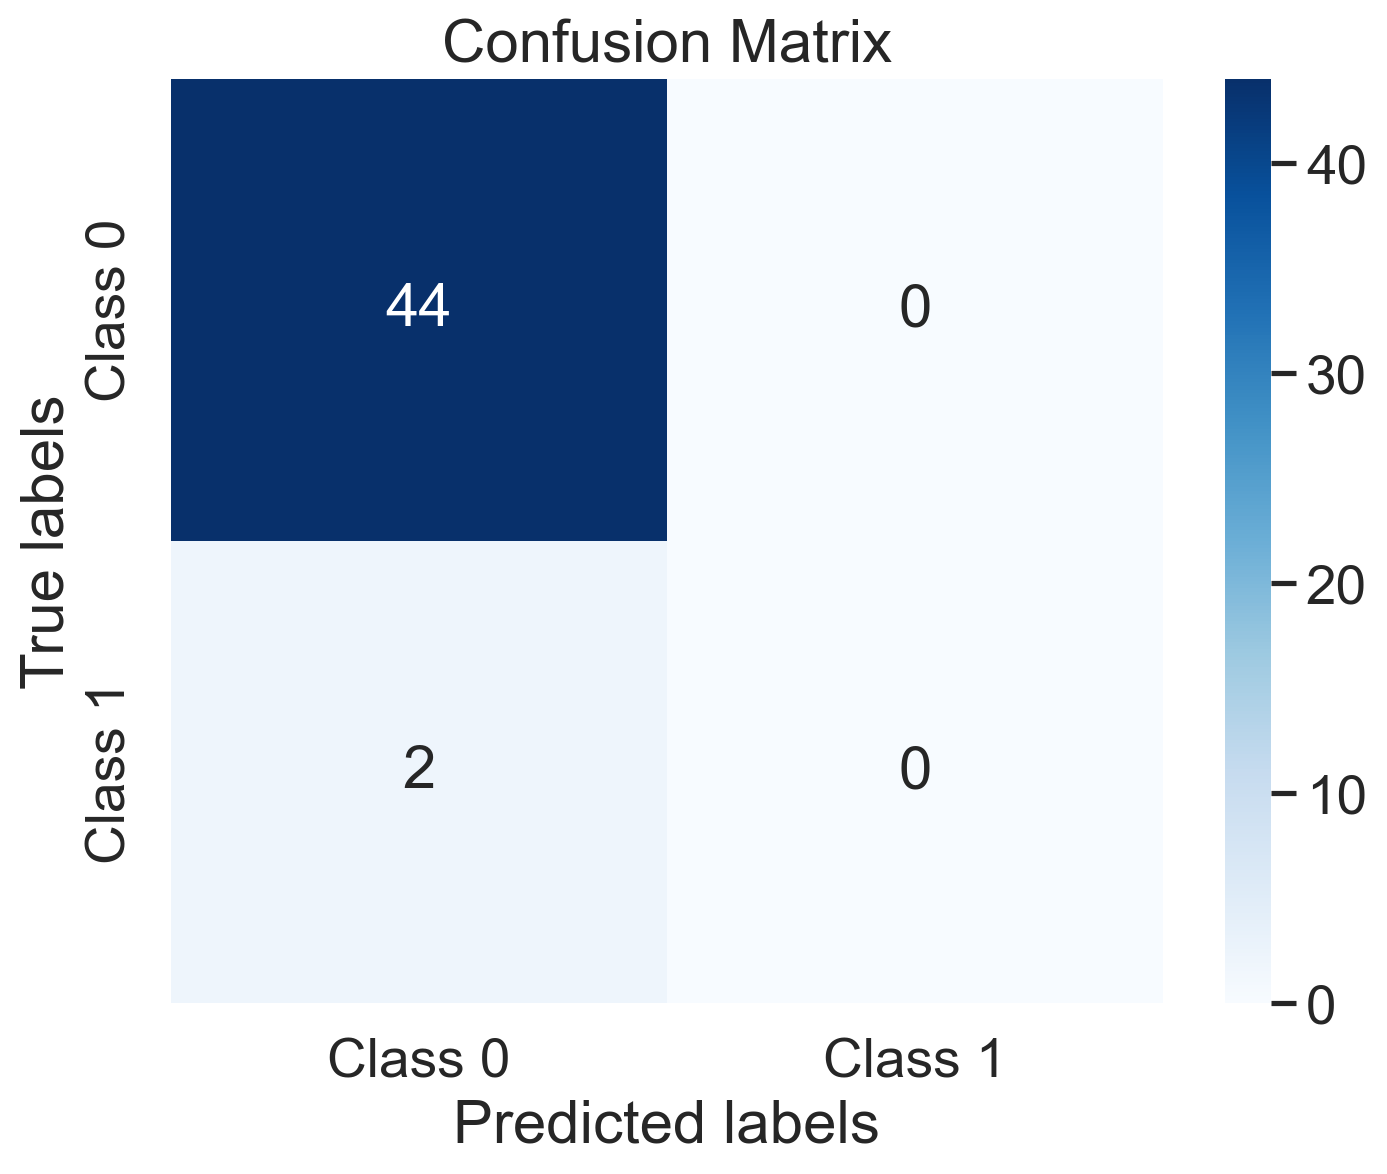

In [22]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

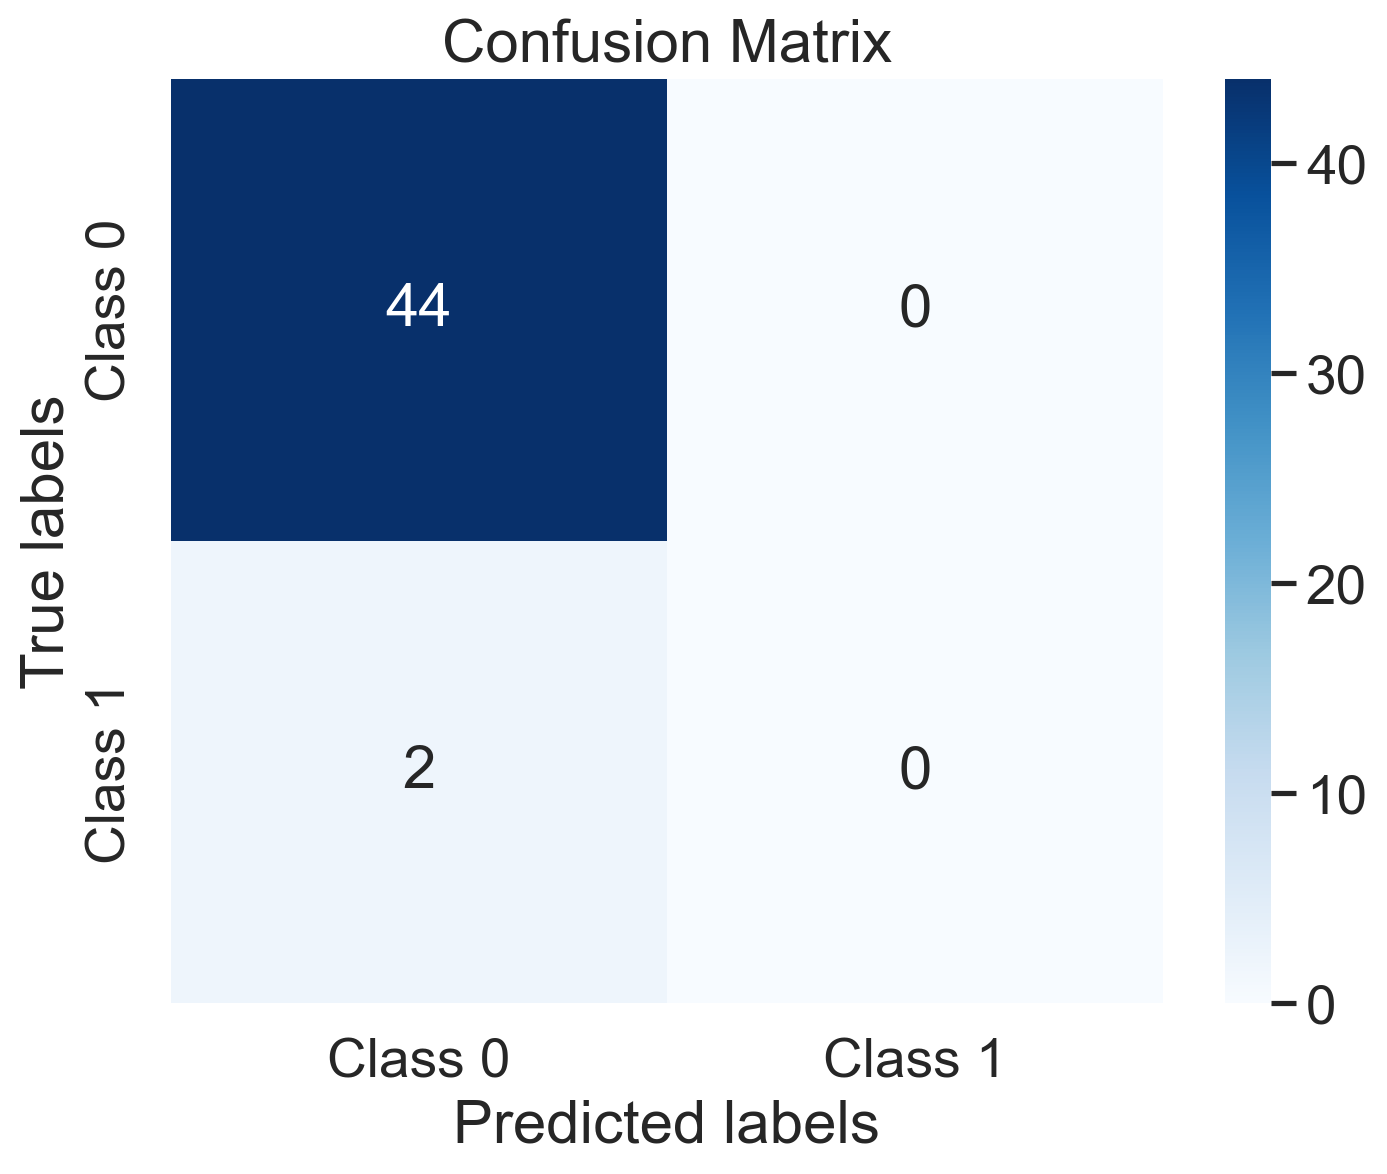

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
